I-Understanding the contexte

Ce projet vise à exploiter le dataset autos.csv, une base de données riche en informations sur des annonces de voitures d’occasion, afin de comprendre les facteurs influençant le prix des véhicules à titre d'exemples : lâge, le kilométrage et le modèle. Ceci à travers un modèle de régression permettant de prédire le prix d’une voiture d'occasion en fonction de ses caractéristiques.
Ce modèle va servir à fournir des outils d’aide à la décision pour les acheteurs et les vendeurs.


I-1-Describing the data

dateCrawled: Date the car was crawled. (Date)
name: Name of the car. (String)
seller: Type of seller (private or dealer). (String)
offerType: Type of offer (e.g. sale, repair, etc.). (String)
price: Price of the car. (Integer)
abtest: Test type (A or B). (String)
vehicleType: Type of vehicle (e.g. SUV, sedan, etc.). (String)
yearOfRegistration: Year the car was registered. (Integer)
gearbox: Type of gearbox (manual or automatic). (String)
powerPS: Power of the car in PS. (Integer)
model: Model of the car. (String)
kilometer: Kilometers the car has been driven. (Integer)
monthOfRegistration:	Month the car was registered. (Integer)
fuelType: Type of fuel (e.g. diesel, petrol, etc.). (String)
brand:	Brand of the car. (String)
notRepairedDamage:	Whether or not the car has any damage that has not been repaired. (String)
dateCreated: Date the car was created. (Date)
nrOfPictures: Number of pictures of the car. (Integer)
postalCode: Postal code of the car. (Integer)
lastSeen: Date the car was last seen. (Date)


I-2-Load libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I-3-Load and explore the data

In [4]:
#import data
df=pd.read_csv("E:/MSDE6/M6/Machine learning MSDE/Projet ML regression/autos.csv")

C:\Users\fzmou\AppData\Local\Temp\ipykernel_24468\3256801621.py:2: DtypeWarning: Columns (0,5,8,10,12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("E:/MSDE6/M6/Machine learning MSDE/Projet ML regression/autos.csv")


In [5]:
# Vérifier le type des variables
# j'ai vérifié le type en premier car j'ai eu un message d'erreur que y'a des variables avec des valeurs mixtes
df.dtypes

index                   object
dateCrawled             object
name                    object
seller                  object
offerType               object
price                   object
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerPS                 object
model                   object
kilometer               object
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode              object
lastSeen                object
dtype: object

In [6]:
#show the head of data
df.head()

index       dateCrawled                            name  seller offerType  \
0     0  24/03/2016 11:52                      Golf_3_1.6  privat   Angebot   
1     1  24/03/2016 10:58            A5_Sportback_2.7_Tdi  privat   Angebot   
2     2  14/03/2016 12:52  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3     3  17/03/2016 16:54              GOLF_4_1_4__3TÜRER  privat   Angebot   
4     4  31/03/2016 17:25  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType yearOfRegistration    gearbox  ...  model  \
0    480   test         NaN               1993    manuell  ...   golf   
1  18300   test       coupe               2011    manuell  ...    NaN   
2   9800   test         suv               2004  automatik  ...  grand   
3   1500   test  kleinwagen               2001    manuell  ...   golf   
4   3600   test  kleinwagen               2008    manuell  ...  fabia   

  kilometer monthOfRegistration fuelType       brand notRepairedDamage  \
0    150000                   0   benzin  volkswagen               NaN   
1    125000                   5   diesel        audi                ja   
2    125000                   8   diesel        jeep               NaN   
3    150000                   6   benzin  volkswagen              nein   
4     90000                   7   diesel       skoda              nein   

        dateCreated nrOfPictures  postalCode          lastSeen  
0  24/03/2016 00:00          0.0       70435  07/04/2016 03:16  
1  24/03/2016 00:00          0.0       66954  07/04/2016 01:46  
2  14/03/2016 00:00          0.0       90480  05/04/2016 12:47  
3  17/03/2016 00:00          0.0       91074  17/03/2016 17:40  
4  31/03/2016 00:00          0.0       60437  06/04/2016 10:17  

[5 rows x 21 columns]

In [7]:
#show the dataframe shape
df.shape

(371539, 21)

In [8]:
#show the columns names
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

I-4-Cleaning the data 

II-Exploratory data Analysis

In [9]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                371538 non-null  object 
 1   dateCrawled          371539 non-null  object 
 2   name                 371539 non-null  object 
 3   seller               371538 non-null  object 
 4   offerType            371538 non-null  object 
 5   price                371538 non-null  object 
 6   abtest               371538 non-null  object 
 7   vehicleType          333669 non-null  object 
 8   yearOfRegistration   371538 non-null  object 
 9   gearbox              351329 non-null  object 
 10  powerPS              371538 non-null  object 
 11  model                351053 non-null  object 
 12  kilometer            371538 non-null  object 
 13  monthOfRegistration  371538 non-null  object 
 14  fuelType             338152 non-null  object 
 15  brand            

les variables vehicleType, gearbox, model, fuelType, et notRepairedDamage ont des valeurs manquantes

In [10]:
#supprimer les missing values
df_clean = df.dropna(axis=0)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260956 entries, 3 to 371538
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                260956 non-null  object 
 1   dateCrawled          260956 non-null  object 
 2   name                 260956 non-null  object 
 3   seller               260956 non-null  object 
 4   offerType            260956 non-null  object 
 5   price                260956 non-null  object 
 6   abtest               260956 non-null  object 
 7   vehicleType          260956 non-null  object 
 8   yearOfRegistration   260956 non-null  object 
 9   gearbox              260956 non-null  object 
 10  powerPS              260956 non-null  object 
 11  model                260956 non-null  object 
 12  kilometer            260956 non-null  object 
 13  monthOfRegistration  260956 non-null  object 
 14  fuelType             260956 non-null  object 
 15  brand                2

In [12]:
#Convertir les variables en numerique 'price', 'yearOfRegistration', 'powerPS', 'kilometer'
columns_to_convert = ['price', 'yearOfRegistration', 'powerPS', 'kilometer']
df_clean[columns_to_convert] = df_clean[columns_to_convert].apply(pd.to_numeric, errors='coerce')

C:\Users\fzmou\AppData\Local\Temp\ipykernel_24468\311127776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_convert] = df_clean[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260956 entries, 3 to 371538
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                260956 non-null  object 
 1   dateCrawled          260956 non-null  object 
 2   name                 260956 non-null  object 
 3   seller               260956 non-null  object 
 4   offerType            260956 non-null  object 
 5   price                260956 non-null  int64  
 6   abtest               260956 non-null  object 
 7   vehicleType          260956 non-null  object 
 8   yearOfRegistration   260956 non-null  int64  
 9   gearbox              260956 non-null  object 
 10  powerPS              260956 non-null  int64  
 11  model                260956 non-null  object 
 12  kilometer            260956 non-null  int64  
 13  monthOfRegistration  260956 non-null  object 
 14  fuelType             260956 non-null  object 
 15  brand                2

In [14]:
# avant de choisir quelle variables garder j'ai du savoir les observations de brand et model, certe model est plus spécifique que brand mais après quand je vais faire l'encodage des variables qualitatives je vais avoir plusieurs colonnes issues de la variable model donc je vais garder brand
valeurs_uniques1 = df['brand'].unique()
valeurs_uniques1

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada', nan, '30/03/2016 00:44',
       'ja', 'nein'], dtype=object)

In [15]:
# les observations de model
valeurs_uniques = df_clean['model'].unique()
valeurs_uniques

array(['golf', 'fabia', '3er', '2_reihe', 'andere', '3_reihe', 'passat',
       'navara', 'twingo', 'c_max', 'a_klasse', 'scirocco', '5er',
       'arosa', 'civic', 'transporter', 'punto', 'e_klasse', 'one',
       'clio', '1er', 'b_klasse', 'astra', 'fortwo', 'a8', 'jetta',
       'polo', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156',
       'escort', 'forester', 'scenic', 'a1', 'combo', 'focus', 'tt', 'a6',
       'jazz', 'slk', '7er', '80', '147', 'glk', 'meriva', 'z_reihe',
       'v40', 'ibiza', 'mustang', 'eos', 'a4', 'touran', 'getz',
       'insignia', 'megane', 'a3', 'lupo', 'r19', 'colt', 'corsa',
       'vectra', 'berlingo', 'm_klasse', 'tiguan', 'sharan', '6_reihe',
       'c4', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo', '5_reihe',
       'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe', 'mondeo', '6er',
       'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan', 'omega',
       'cuore', 's_max', 'modus', 'a2', 'x_reihe', 'a5', 'galaxy', 'c3',
       'viano', 's_k

In [16]:
# Les variables index, offerType dateCrawled, name, seller, dateCreated, nrOfPictures, postalCode, 'lastSee, abtest (car l'objectif n'est pas de voir est ce que le prix des voitures du groupe test est différent), monthOfRegistration car (car j'ai yearOfRegistration), model n'ont pas d'intérêt dans la prédiction du prix des véhicules, donc je vais les supprimer'
df_clean = df_clean.drop(columns=['index', 'offerType', 'dateCrawled', 'name', 'seller', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen', 'abtest', 'monthOfRegistration', 'model'])

In [17]:
# Df après suppression des colonnes inutiles
df_clean

price vehicleType  yearOfRegistration    gearbox  powerPS  kilometer  \
3        1500  kleinwagen                2001    manuell       75     150000   
4        3600  kleinwagen                2008    manuell       69      90000   
5         650   limousine                1995    manuell      102     150000   
6        2200      cabrio                2004    manuell      109     150000   
7           0   limousine                1980    manuell       50      40000   
...       ...         ...                 ...        ...      ...        ...   
371531   3200   limousine                2004    manuell      225     150000   
371532   1150         bus                2000    manuell        0     150000   
371535   1199      cabrio                2000  automatik      101     125000   
371536   9200         bus                1996    manuell      102     150000   
371538  28990   limousine                2013    manuell      320      50000   

       fuelType       brand notRepairedDamage  
3        benzin  volkswagen              nein  
4        diesel       skoda              nein  
5        benzin         bmw                ja  
6        benzin     peugeot              nein  
7        benzin  volkswagen              nein  
...         ...         ...               ...  
371531   benzin        seat                ja  
371532   benzin        opel              nein  
371535   benzin       smart              nein  
371536   diesel  volkswagen              nein  
371538   benzin         bmw              nein  

[260956 rows x 9 columns]

In [18]:
#summarize the data
df_clean.describe(include='all')

price vehicleType  yearOfRegistration  gearbox        powerPS  \
count   2.609560e+05      260956       260956.000000   260956  260956.000000   
unique           NaN           8                 NaN        2            NaN   
top              NaN   limousine                 NaN  manuell            NaN   
freq             NaN       76394                 NaN   200059            NaN   
mean    8.208628e+03         NaN         2003.309500      NaN     126.332366   
std     3.433091e+05         NaN            6.512161      NaN     145.277559   
min     0.000000e+00         NaN         1910.000000      NaN       0.000000   
25%     1.500000e+03         NaN         1999.000000      NaN      78.000000   
50%     3.850000e+03         NaN         2004.000000      NaN     116.000000   
75%     8.600000e+03         NaN         2008.000000      NaN     150.000000   
max     1.000000e+08         NaN         2018.000000      NaN   20000.000000   

            kilometer fuelType       brand notRepairedDamage  
count   260956.000000   260956      260956            260956  
unique            NaN        7          39                 2  
top               NaN   benzin  volkswagen              nein  
freq              NaN   169242       54194            232946  
mean    124058.672726      NaN         NaN               NaN  
std      39848.176772      NaN         NaN               NaN  
min       5000.000000      NaN         NaN               NaN  
25%     100000.000000      NaN         NaN               NaN  
50%     150000.000000      NaN         NaN               NaN  
75%     150000.000000      NaN         NaN               NaN  
max     150000.000000      NaN         NaN               NaN

In [19]:
# Créer une nouvelle variable âge du véhicule à partir de la variable yearOfRegistration
# Obtenir l'année actuelle
from datetime import datetime
current_year = datetime.now().year
current_year

2025

In [20]:
# Nouvelle variable age 
df_clean['age'] = current_year - df_clean['yearOfRegistration']
df_clean.head()

price vehicleType  yearOfRegistration  gearbox  powerPS  kilometer  \
3   1500  kleinwagen                2001  manuell       75     150000   
4   3600  kleinwagen                2008  manuell       69      90000   
5    650   limousine                1995  manuell      102     150000   
6   2200      cabrio                2004  manuell      109     150000   
7      0   limousine                1980  manuell       50      40000   

  fuelType       brand notRepairedDamage  age  
3   benzin  volkswagen              nein   24  
4   diesel       skoda              nein   17  
5   benzin         bmw                ja   30  
6   benzin     peugeot              nein   21  
7   benzin  volkswagen              nein   45

In [21]:
# supprimer la variable yearOfRegistration puisque j'ai age du vehicule
df_clean = df_clean.drop(columns=['yearOfRegistration'])

In [22]:
#summarize df_clean
df_clean.describe()

price        powerPS      kilometer            age
count  2.609560e+05  260956.000000  260956.000000  260956.000000
mean   8.208628e+03     126.332366  124058.672726      21.690500
std    3.433091e+05     145.277559   39848.176772       6.512161
min    0.000000e+00       0.000000    5000.000000       7.000000
25%    1.500000e+03      78.000000  100000.000000      17.000000
50%    3.850000e+03     116.000000  150000.000000      21.000000
75%    8.600000e+03     150.000000  150000.000000      26.000000
max    1.000000e+08   20000.000000  150000.000000     115.000000

II-Exploratory Data Analysis (EDA)

In [23]:
# distribution de la variable dépendante 'price'
# j'ai effectué ce code sns.histplot(df_clean['price'], kde=True), le kernel s'est bloqué, donc j'ai vérifié la présence de valeurs nulles 
print(df_clean['price'].head())

3    1500
4    3600
5     650
6    2200
7       0
Name: price, dtype: int64


In [24]:
#supprimer les valeurs nulles dans 'price'
df_clean = df_clean[df_clean['price'] > 0]

<Axes: >

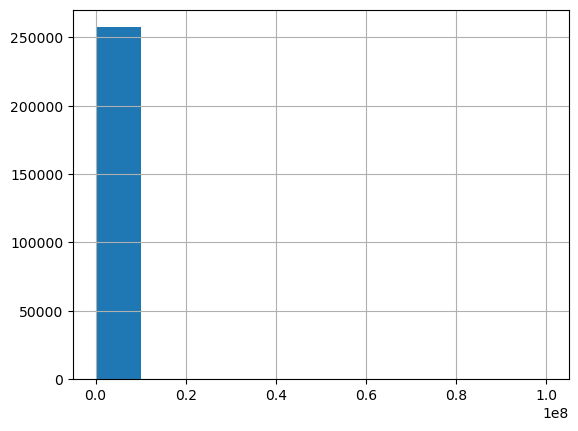

In [25]:
#show the histogram of the target value 'price'
df_clean['price'].hist()

<Axes: xlabel='price', ylabel='Count'>

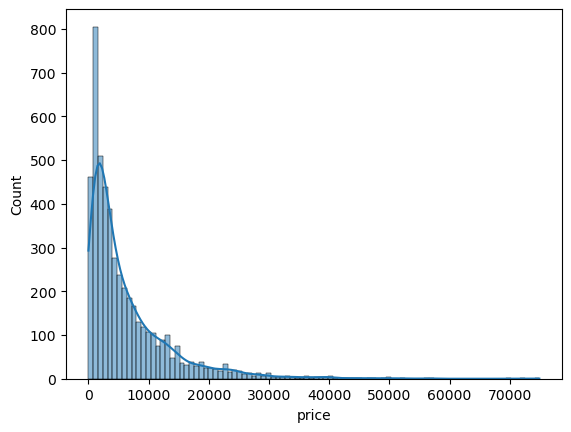

In [26]:
# distibution de la variable target 'price' avec courbe de densité
# le kernel bloque toujours, solution = échantillon plus petit "5000"
sns.histplot(df_clean['price'].sample(5000), kde=True) 

# la distribution de la variable 'price'est asymétrique avec une concentration à droite où les prix sont plus bas, ceci dit que y'aura des outliers dans les prix les plus élevés ce qui est logique vu que ce sont des used cars, je vais supprimé les outliers 

In [27]:
#outliers treatment
# j'ai effectué la méthode des quartiles j'ai du supprimer 7.8 % de l'ensemble du df_clean, donc j'ai opté pour supprimer les outliers au delà de 99e percentile
# calcul du 99e percentile
percentile_99 = np.percentile(df_clean['price'], 99)
# filtrage des données pour ne conserver que les valeurs <= au 99e percentile
df_clean_without_outliers= df_clean[df_clean['price'] <= percentile_99]
df_clean_without_outliers

price vehicleType    gearbox  powerPS  kilometer fuelType       brand  \
3        1500  kleinwagen    manuell       75     150000   benzin  volkswagen   
4        3600  kleinwagen    manuell       69      90000   diesel       skoda   
5         650   limousine    manuell      102     150000   benzin         bmw   
6        2200      cabrio    manuell      109     150000   benzin     peugeot   
10       2000   limousine    manuell      105     150000   benzin       mazda   
...       ...         ...        ...      ...        ...      ...         ...   
371531   3200   limousine    manuell      225     150000   benzin        seat   
371532   1150         bus    manuell        0     150000   benzin        opel   
371535   1199      cabrio  automatik      101     125000   benzin       smart   
371536   9200         bus    manuell      102     150000   diesel  volkswagen   
371538  28990   limousine    manuell      320      50000   benzin         bmw   

       notRepairedDamage  age  
3                   nein   24  
4                   nein   17  
5                     ja   30  
6                   nein   21  
10                  nein   21  
...                  ...  ...  
371531                ja   21  
371532              nein   25  
371535              nein   25  
371536              nein   29  
371538              nein   12  

[254992 rows x 9 columns]

<Axes: xlabel='price', ylabel='Count'>

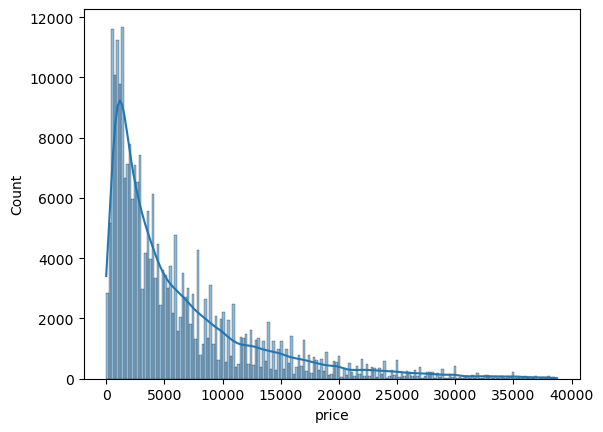

In [28]:
#distribution de la varaible target 'price' après suppression des outliers au delà de 99e percentile
sns.histplot(df_clean_without_outliers['price'], kde=True) 

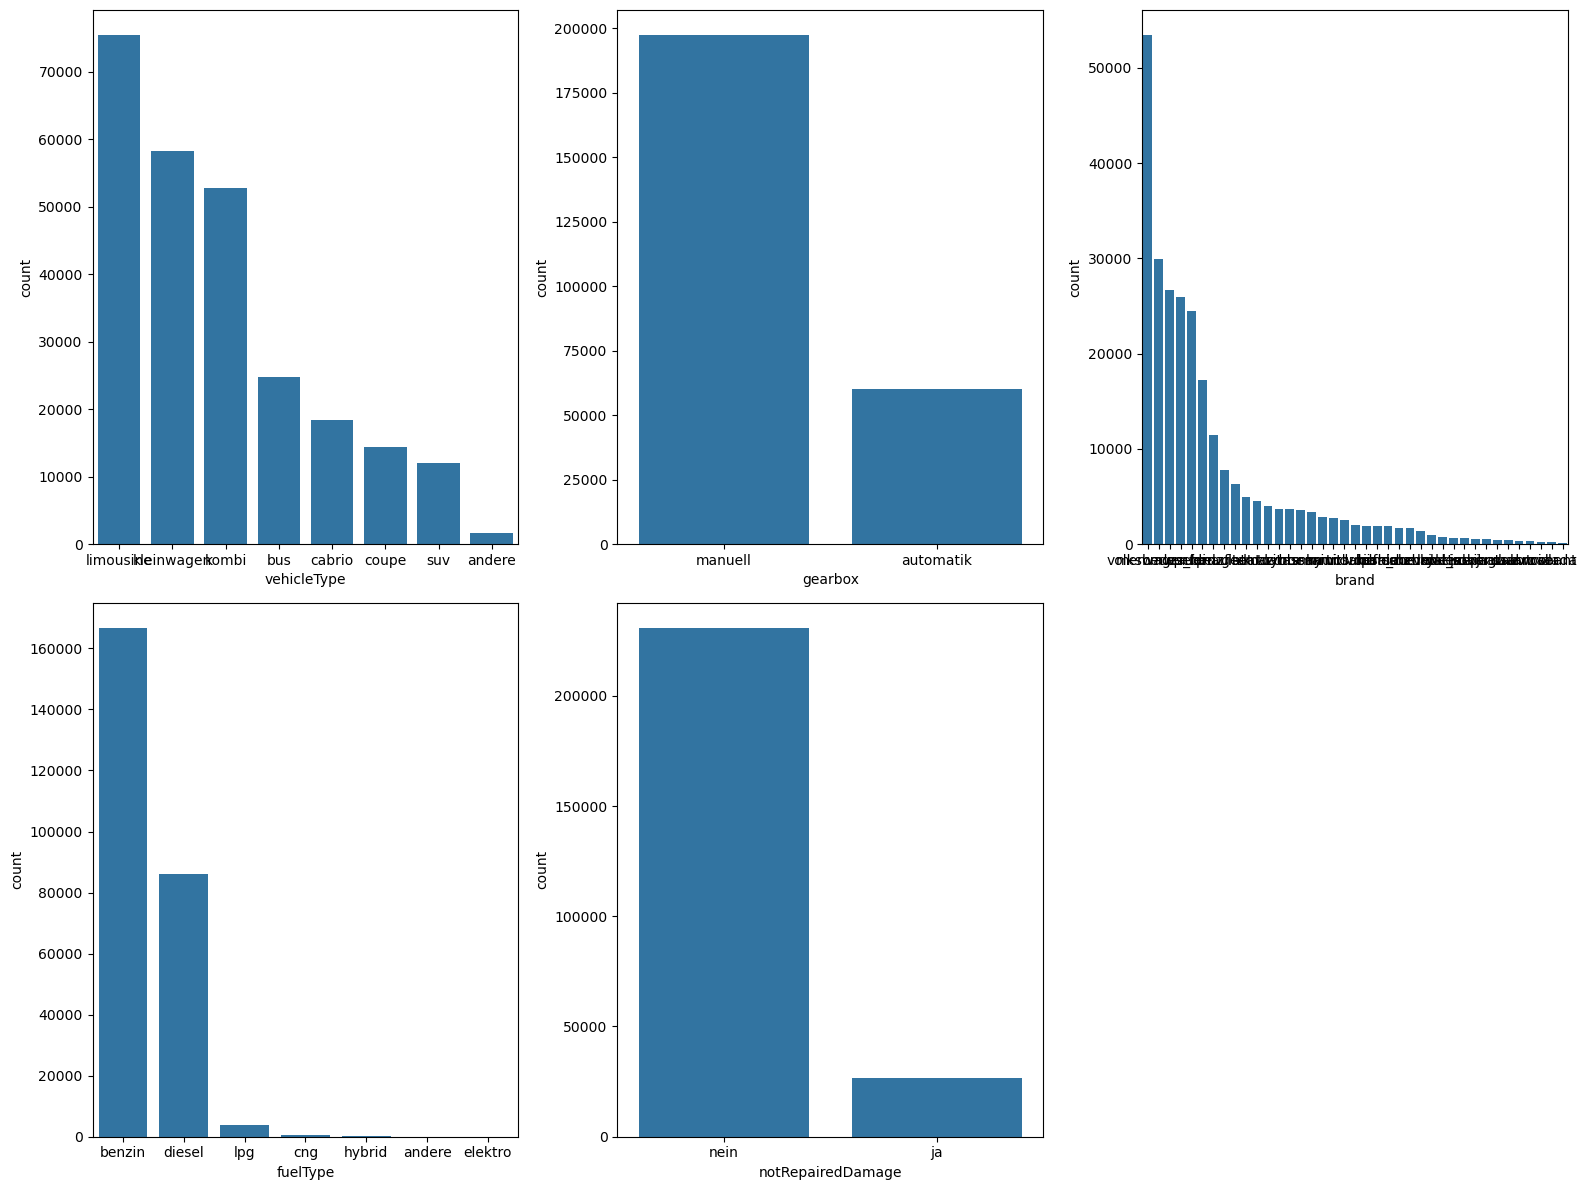

In [29]:
# plot des variables qualitatives par des graphs en barre
plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
sns.countplot(x='vehicleType', data=df_clean,order=df_clean['vehicleType'].value_counts().index)
plt.subplot(2, 3, 2)
sns.countplot(x='gearbox', data=df_clean,order=df_clean['gearbox'].value_counts().index)
plt.subplot(2, 3, 3)
sns.countplot(x='brand', data=df_clean,order=df_clean['brand'].value_counts().index)
plt.subplot(2, 3, 4)
sns.countplot(x='fuelType', data=df_clean,order=df_clean['fuelType'].value_counts().index)
plt.subplot(2, 3, 5)
sns.countplot(x='notRepairedDamage', data=df_clean,order=df_clean['notRepairedDamage'].value_counts().index)

plt.tight_layout() # ajuster l'espace entre les graphs

<Axes: xlabel='notRepairedDamage', ylabel='price'>

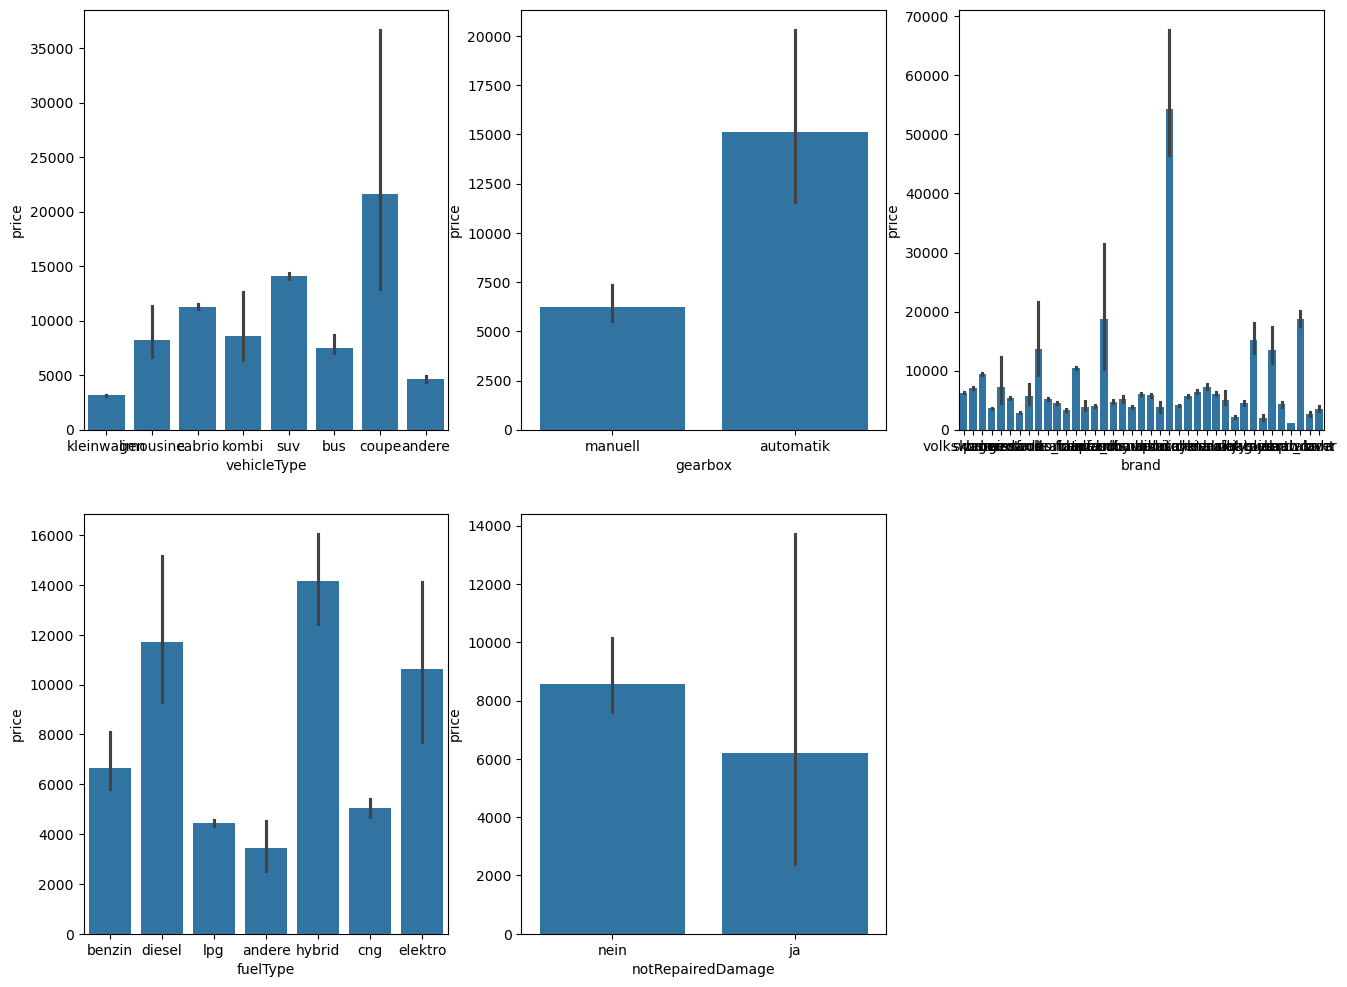

In [30]:
#plot peer to peer relation price and categorical variables
plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
sns.barplot(x='vehicleType', y='price', data=df_clean)
plt.subplot(2, 3, 2)
sns.barplot(x='gearbox', y='price', data=df_clean)
plt.subplot(2, 3, 3)
sns.barplot(x='brand', y='price', data=df_clean)
plt.subplot(2, 3, 4)
sns.barplot(x='fuelType', y='price', data=df_clean)
plt.subplot(2, 3, 5)
sns.barplot(x='notRepairedDamage', y='price', data=df_clean)

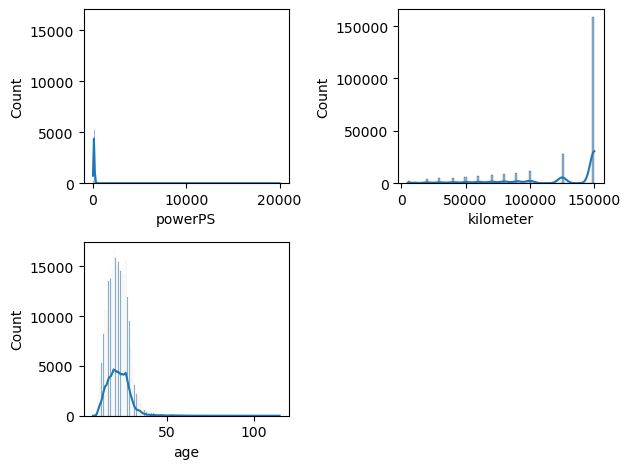

In [31]:
# distribution des autres variables quantitatives powerPS, kilometer, age
plt.subplot(2, 2, 1) 
sns.histplot(df_clean_without_outliers['powerPS'], kde=True) 
plt.subplot(2, 2, 2) 
sns.histplot(df_clean_without_outliers['kilometer'], kde=True) 
plt.subplot(2, 2, 3)
sns.histplot(df_clean_without_outliers['age'], kde=True) 
plt.tight_layout() 

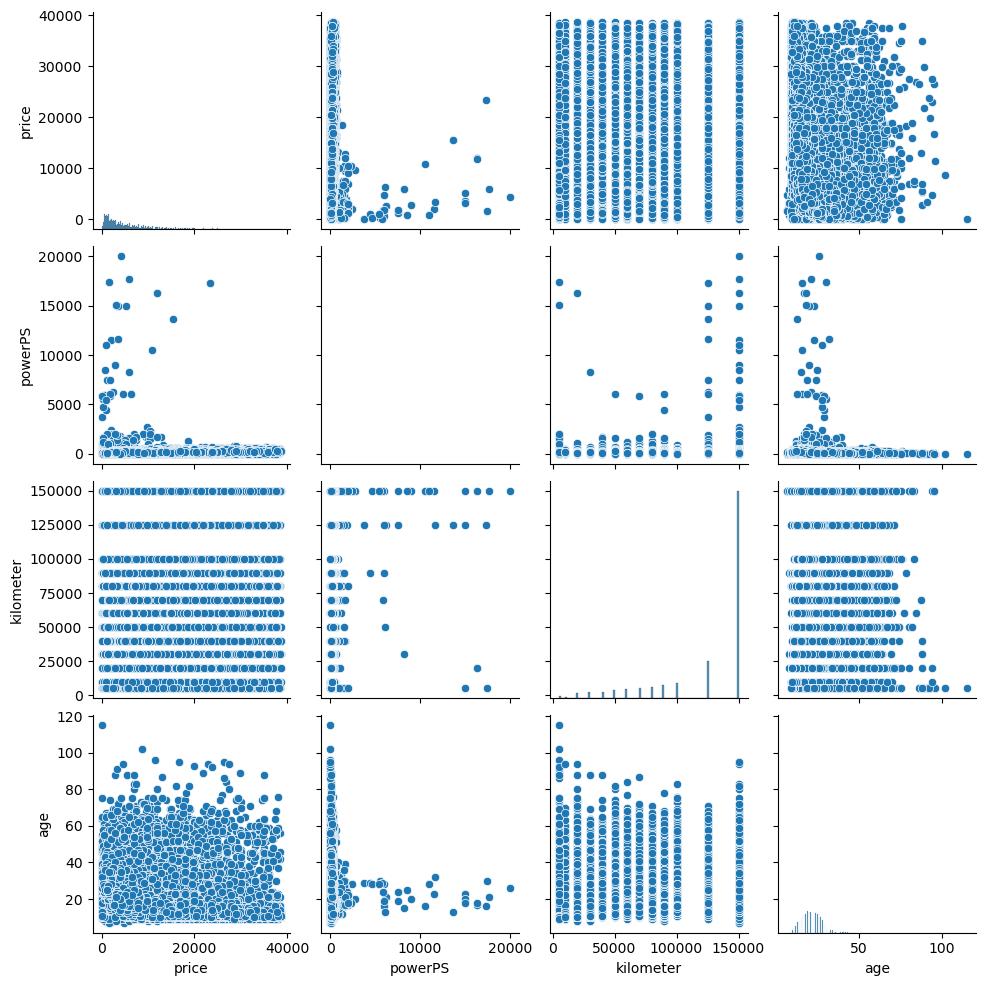

In [32]:
# plot peer to peer relation of numeric variables (sns.pairplot())
sns.pairplot(df_clean_without_outliers)

# supprimer les outliers dans les autres variables quantitatives

In [33]:
# Calcul du 99e percentile pour powerPS
percentile_99 = np.percentile(df_clean_without_outliers['powerPS'], 99)
# filtrage des données pour ne conserver que les valeurs <= au 99e percentile
df1= df_clean_without_outliers[df_clean_without_outliers['powerPS'] <= percentile_99]

<Axes: xlabel='powerPS', ylabel='Count'>

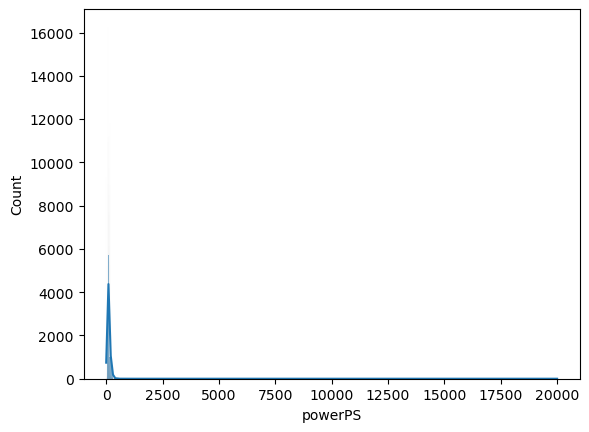

In [34]:
#distribution de la varaible powerPS après suppression des outliers 
sns.histplot(df_clean_without_outliers['powerPS'], kde=True) 

In [35]:
# Calcul du 99e percentile pour powerPS
percentile_99 = np.percentile(df1['kilometer'], 99)
# filtrage des données pour ne conserver que les valeurs <= au 99e percentile
df2= df1[df1['kilometer'] <= percentile_99]

<Axes: xlabel='kilometer', ylabel='Count'>

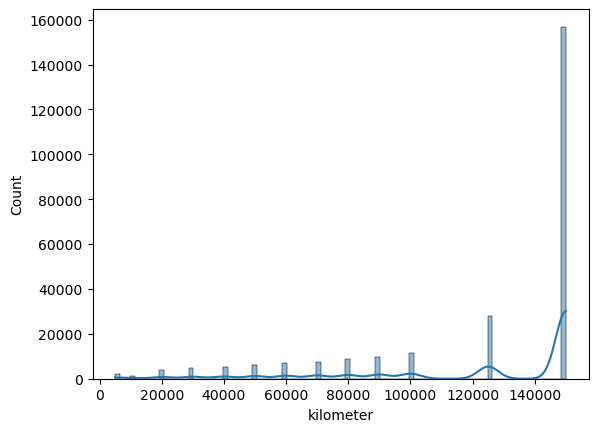

In [36]:
#distribution de la varaible powerPS après suppression des outliers 
sns.histplot(df1['kilometer'], kde=True) 

In [37]:
# Calcul du 99e percentile pour age
percentile_99 = np.percentile(df2['age'], 99)
# filtrage des données pour ne conserver que les valeurs <= au 99e percentile
df3= df2[df2['age'] <= percentile_99]

<Axes: xlabel='age', ylabel='Count'>

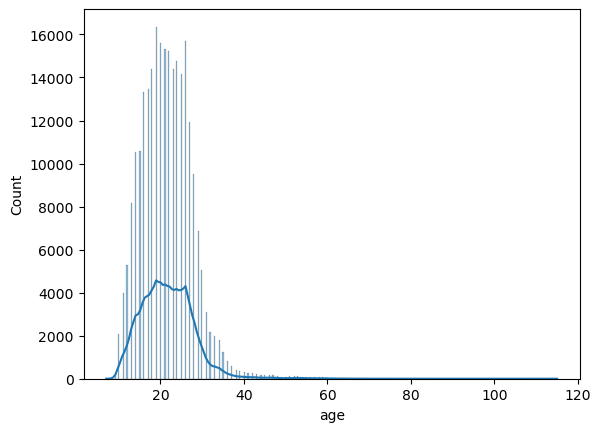

In [38]:
#distribution de la varaible age après suppression des outliers 
sns.histplot(df2['age'], kde=True) 

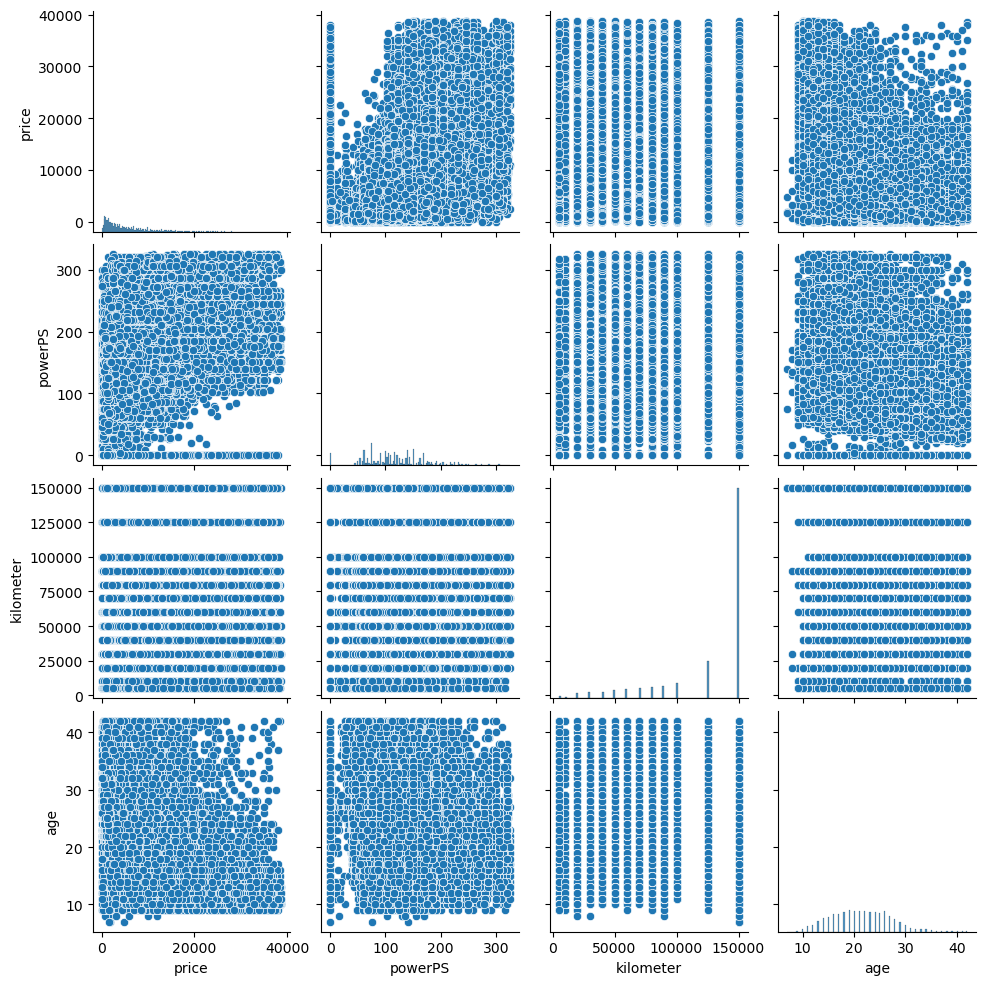

In [39]:
# plot peer to peer relation of variables after removing outliers
sns.pairplot(df3)

In [40]:
# Malgré la suppression des outliers y'a pas encore une relation linéaire entre le prix et les autres variables quantitatives, pour ceci je vais effectué une transformation logarithmique du prix
logprice = np.log(df3['price'])

In [41]:
# Ajouter le logprice à df3
df3['log_price'] = logprice
df3

C:\Users\fzmou\AppData\Local\Temp\ipykernel_24468\734760170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_price'] = logprice


price vehicleType    gearbox  powerPS  kilometer fuelType       brand  \
3        1500  kleinwagen    manuell       75     150000   benzin  volkswagen   
4        3600  kleinwagen    manuell       69      90000   diesel       skoda   
5         650   limousine    manuell      102     150000   benzin         bmw   
6        2200      cabrio    manuell      109     150000   benzin     peugeot   
10       2000   limousine    manuell      105     150000   benzin       mazda   
...       ...         ...        ...      ...        ...      ...         ...   
371531   3200   limousine    manuell      225     150000   benzin        seat   
371532   1150         bus    manuell        0     150000   benzin        opel   
371535   1199      cabrio  automatik      101     125000   benzin       smart   
371536   9200         bus    manuell      102     150000   diesel  volkswagen   
371538  28990   limousine    manuell      320      50000   benzin         bmw   

       notRepairedDamage  age  log_price  
3                   nein   24   7.313220  
4                   nein   17   8.188689  
5                     ja   30   6.476972  
6                   nein   21   7.696213  
10                  nein   21   7.600902  
...                  ...  ...        ...  
371531                ja   21   8.070906  
371532              nein   25   7.047517  
371535              nein   25   7.089243  
371536              nein   29   9.126959  
371538              nein   12  10.274706  

[250204 rows x 10 columns]

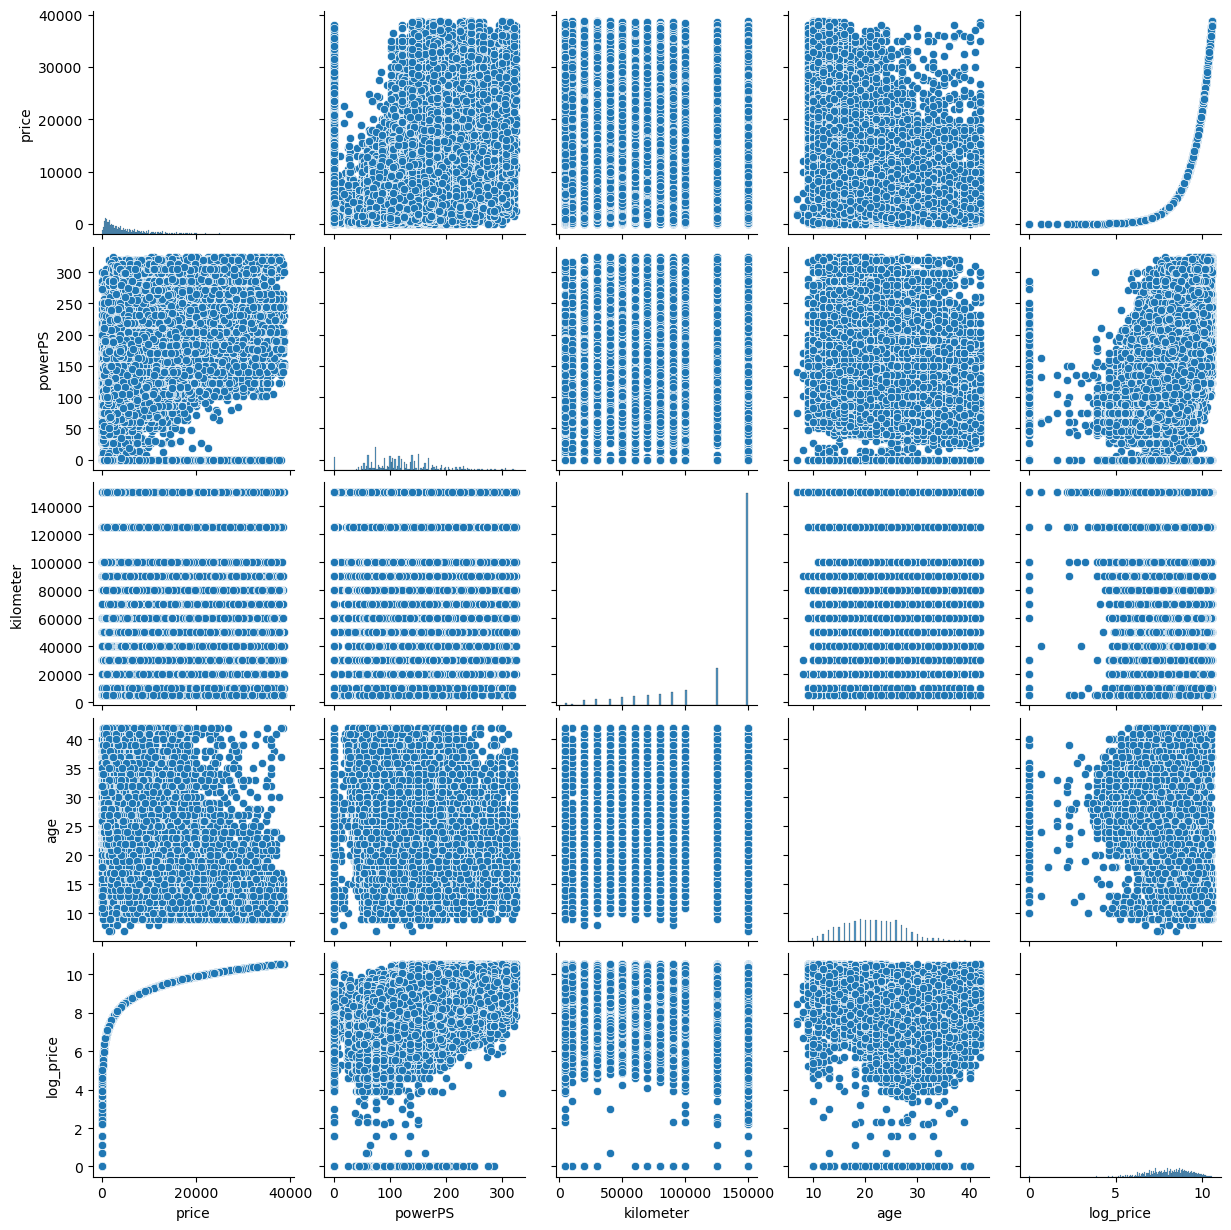

In [42]:
# plot peer to peer relation of variables after log transformation
sns.pairplot(df3)

# La transformation logarithmique sur le prix a amélioré la linéarité pour la plupart des variables
# Une relation positive non strictement linéaire est visible pour des puissances raisonnables jusqu’à 300 PS
# Une relation négative presque linéaire entre logprice et kilometer
# Une relation négative presque linéaire entre logprice et age, la transformation rend la décroissance du prix par rapport à l’âge plus progressive et visible.

In [43]:
# Supprimer price de df3 et garder logprice
df3=df3.drop(['price'],axis=1)
df3

vehicleType    gearbox  powerPS  kilometer fuelType       brand  \
3       kleinwagen    manuell       75     150000   benzin  volkswagen   
4       kleinwagen    manuell       69      90000   diesel       skoda   
5        limousine    manuell      102     150000   benzin         bmw   
6           cabrio    manuell      109     150000   benzin     peugeot   
10       limousine    manuell      105     150000   benzin       mazda   
...            ...        ...      ...        ...      ...         ...   
371531   limousine    manuell      225     150000   benzin        seat   
371532         bus    manuell        0     150000   benzin        opel   
371535      cabrio  automatik      101     125000   benzin       smart   
371536         bus    manuell      102     150000   diesel  volkswagen   
371538   limousine    manuell      320      50000   benzin         bmw   

       notRepairedDamage  age  log_price  
3                   nein   24   7.313220  
4                   nein   17   8.188689  
5                     ja   30   6.476972  
6                   nein   21   7.696213  
10                  nein   21   7.600902  
...                  ...  ...        ...  
371531                ja   21   8.070906  
371532              nein   25   7.047517  
371535              nein   25   7.089243  
371536              nein   29   9.126959  
371538              nein   12  10.274706  

[250204 rows x 9 columns]

In [44]:
# Chercher la multicolinéarité entre logprice et les variables qualitatives et quantitatives du df3
# Les variables qualitatives doivent être encodées en premier
df3_encoded = pd.get_dummies(df3, drop_first=True)
df3_encoded

powerPS  kilometer  age  log_price  vehicleType_bus  \
3            75     150000   24   7.313220            False   
4            69      90000   17   8.188689            False   
5           102     150000   30   6.476972            False   
6           109     150000   21   7.696213            False   
10          105     150000   21   7.600902            False   
...         ...        ...  ...        ...              ...   
371531      225     150000   21   8.070906            False   
371532        0     150000   25   7.047517             True   
371535      101     125000   25   7.089243            False   
371536      102     150000   29   9.126959             True   
371538      320      50000   12  10.274706            False   

        vehicleType_cabrio  vehicleType_coupe  vehicleType_kleinwagen  \
3                    False              False                    True   
4                    False              False                    True   
5                    False              False                   False   
6                     True              False                   False   
10                   False              False                   False   
...                    ...                ...                     ...   
371531               False              False                   False   
371532               False              False                   False   
371535                True              False                   False   
371536               False              False                   False   
371538               False              False                   False   

        vehicleType_kombi  vehicleType_limousine  ...  brand_seat  \
3                   False                  False  ...       False   
4                   False                  False  ...       False   
5                   False                   True  ...       False   
6                   False                  False  ...       False   
10                  False                   True  ...       False   
...                   ...                    ...  ...         ...   
371531              False                   True  ...        True   
371532              False                  False  ...       False   
371535              False                  False  ...       False   
371536              False                  False  ...       False   
371538              False                   True  ...       False   

        brand_skoda  brand_smart  brand_subaru  brand_suzuki  brand_toyota  \
3             False        False         False         False         False   
4              True        False         False         False         False   
5             False        False         False         False         False   
6             False        False         False         False         False   
10            False        False         False         False         False   
...             ...          ...           ...           ...           ...   
371531        False        False         False         False         False   
371532        False        False         False         False         False   
371535        False         True         False         False         False   
371536        False        False         False         False         False   
371538        False        False         False         False         False   

        brand_trabant  brand_volkswagen  brand_volvo  notRepairedDamage_nein  
3               False              True        False                    True  
4               False             False        False                    True  
5               False             False        False                   False  
6               False             False        False                    True  
10              False             False        False                    True  
...               ...               ...          ...                     ...  
371531          False             False        False   

In [45]:
df3_encoded.columns

Index(['powerPS', 'kilometer', 'age', 'log_price', 'vehicleType_bus',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen',
       'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv',
       'gearbox_manuell', 'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg', 'brand_audi',
       'brand_bmw', 'brand_chevrolet', 'brand_chrysler', 'brand_citroen',
       'brand_dacia', 'brand_daewoo', 'brand_daihatsu', 'brand_fiat',
       'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_jaguar',
       'brand_jeep', 'brand_kia', 'brand_lada', 'brand_lancia',
       'brand_land_rover', 'brand_mazda', 'brand_mercedes_benz', 'brand_mini',
       'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'brand_peugeot',
       'brand_porsche', 'brand_renault', 'brand_rover', 'brand_saab',
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'br

In [46]:
df3_encoded.shape

(250204, 57)

In [47]:
#show correlation between variables
df3_encoded.corr()

powerPS  kilometer       age  log_price  \
powerPS                 1.000000   0.007922 -0.235634   0.527804   
kilometer               0.007922   1.000000  0.492653  -0.410306   
age                    -0.235634   0.492653  1.000000  -0.699392   
log_price               0.527804  -0.410306 -0.699392   1.000000   
vehicleType_bus        -0.028038   0.032420 -0.074311   0.074882   
vehicleType_cabrio      0.104005  -0.080405  0.022719   0.132846   
vehicleType_coupe       0.178448   0.005124  0.045392   0.065796   
vehicleType_kleinwagen -0.486952  -0.120520  0.028691  -0.288541   
vehicleType_kombi       0.147576   0.133486 -0.058835   0.029118   
vehicleType_limousine   0.131194   0.041375  0.084187   0.009358   
vehicleType_suv         0.154245  -0.064528 -0.107199   0.181586   
gearbox_manuell        -0.409989   0.024488  0.114235  -0.272965   
fuelType_benzin        -0.232748  -0.123636  0.308845  -0.334420   
fuelType_cng           -0.017053   0.002455 -0.021070   0.002912   
fuelType_diesel         0.225683   0.114141 -0.318730   0.341072   
fuelType_elektro       -0.014718  -0.028446 -0.016016   0.007676   
fuelType_hybrid        -0.009261  -0.032920 -0.031548   0.023500   
fuelType_lpg            0.049973   0.054125  0.039017  -0.016724   
brand_audi              0.203508   0.032085 -0.037684   0.138149   
brand_bmw               0.293134   0.075097  0.011051   0.144299   
brand_chevrolet         0.000227  -0.042609 -0.027194   0.011239   
brand_chrysler          0.037059   0.016831  0.016292  -0.016894   
brand_citroen          -0.057925  -0.017550 -0.028053  -0.029062   
brand_dacia            -0.033491  -0.054449 -0.063572   0.016001   
brand_daewoo           -0.028320  -0.000550  0.011720  -0.041649   
brand_daihatsu         -0.044215  -0.009648  0.007892  -0.036186   
brand_fiat             -0.121702  -0.042163 -0.012467  -0.078814   
brand_ford             -0.090394  -0.013229 -0.009420  -0.103988   
brand_honda            -0.011133  -0.001891  0.024098  -0.015096   
brand_hyundai          -0.022526  -0.063234 -0.069423   0.013756   
brand_jaguar            0.063909   0.004471  0.006881   0.018866   
brand_jeep              0.047379  -0.000301  0.004771   0.030268   
brand_kia              -0.008362  -0.041940 -0.054878   0.011915   
brand_lada             -0.019243  -0.032230 -0.006821  -0.003748   
brand_lancia           -0.014504  -0.000552  0.013857  -0.024099   
brand_land_rover        0.032151   0.004929 -0.011698   0.044261   
brand_mazda            -0.008776  -0.004976  0.011721  -0.023318   
brand_mercedes_benz     0.200518   0.052014  0.049836   0.115565   
brand_mini              0.009966  -0.090453 -0.077139   0.085511   
brand_mitsubishi       -0.012502   0.000414  0.021152  -0.039091   
brand_nissan           -0.042187  -0.022895 -0.002885  -0.024463   
brand_opel             -0.138124   0.021636  0.057575  -0.160261   
brand_peugeot          -0.072525  -0.013048 -0.016617  -0.056539   
brand_porsche           0.128904  -0.015949  0.017203   0.079407   
brand_renault          -0.130664   0.004537  0.020993  -0.132597   
brand_rover            -0.007083   0.007528  0.023808  -0.032010   
brand_saab              0.029153   0.018111  0.026140  -0.010874   
brand_seat             -0.057220  -0.027337 -0.037293  -0.015114   
brand_skoda            -0.035537  -0.044984 -0.087370   0.043431   
brand_smart            -0.122073  -0.085760 -0.041250  -0.009308   
brand_subaru            0.013152   0.000304  0.016356  -0.013250   
brand_suzuki           -0.047604  -0.040694 -0.006053  -0.010810   
brand_toyota           -0.030557  -0.027291 -0.020587   0.013009   
brand_trabant          -0.040160  -0.041537  0.063546  -0.015372   
brand_volkswagen       -0.137687   0.023187  0.039573   0.006020   
brand_volvo             0.048628   0.035086  0.025073  -0.009091   
notRepairedDamage_nein  0.095843  -0.103670 -0.158780   0.324103   

                        vehicleType_bus  vehicleType_cabrio  \
powerPS          

<Axes: >

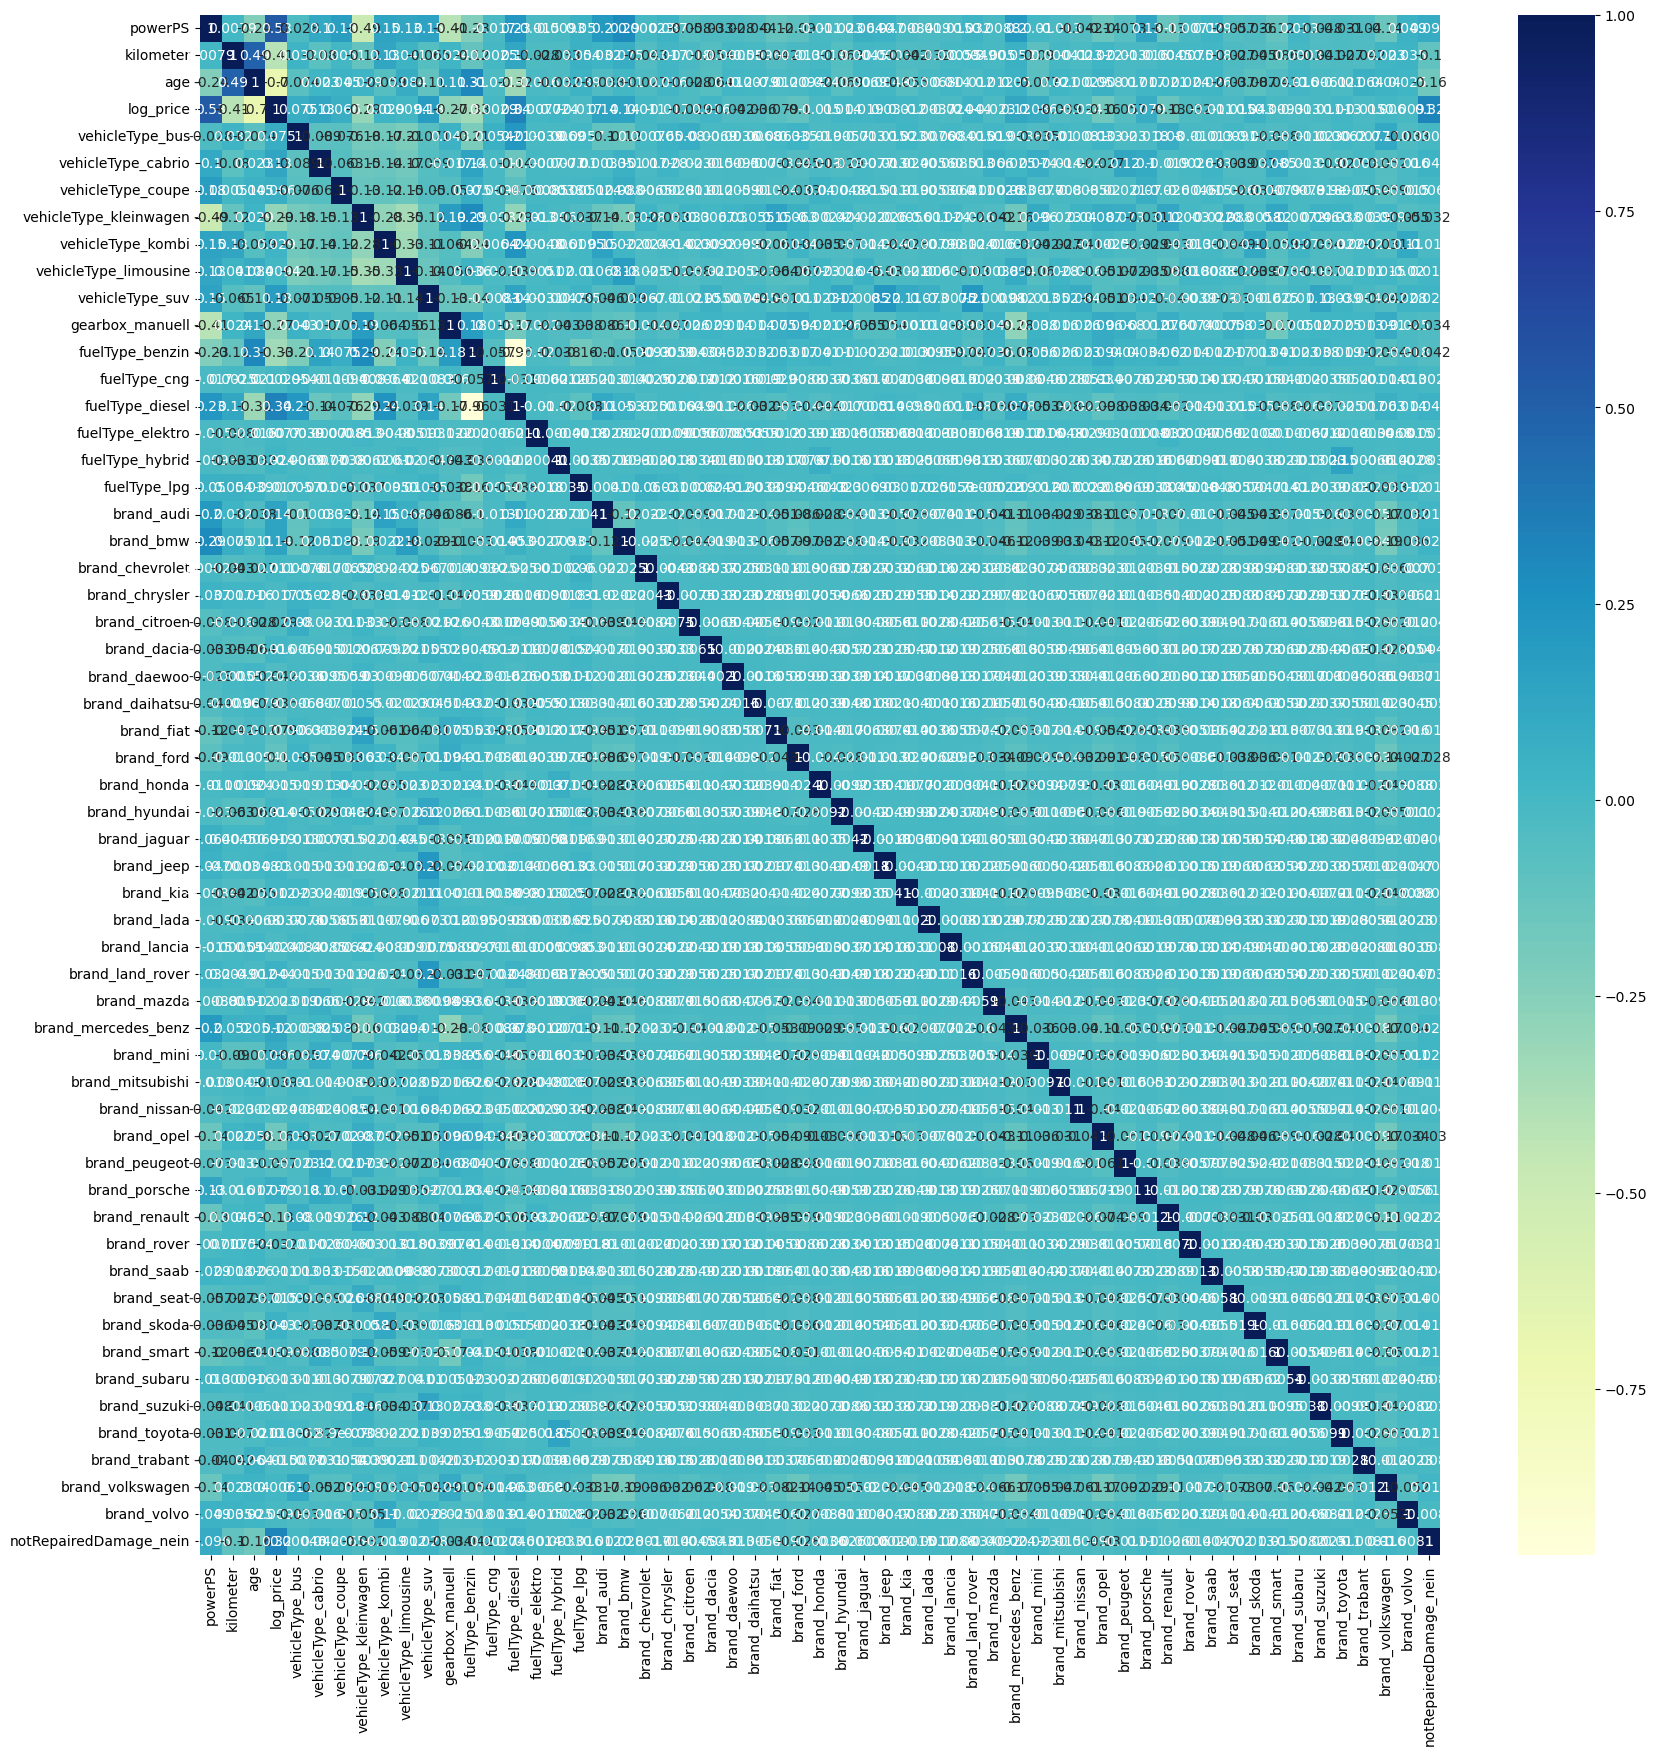

In [48]:
# map this correlation 
plt.figure(figsize=(20,20))
sns.heatmap(df3_encoded.corr(),cmap="YlGnBu",annot=True)

In [49]:
# pour que la map de correlation soit plus visible je vais filtrer pour ne conserver que les valeurs qui sont au-dessus de 0.5 ou en dessous de -0.5
# Appliquer le seuil (seulement les corrélations > 0.5 ou < -0.5)
threshold = 0.5
filtered_corr = df3_encoded.corr().where((df3_encoded.corr() > threshold) | (df3_encoded.corr() < -threshold), 0)

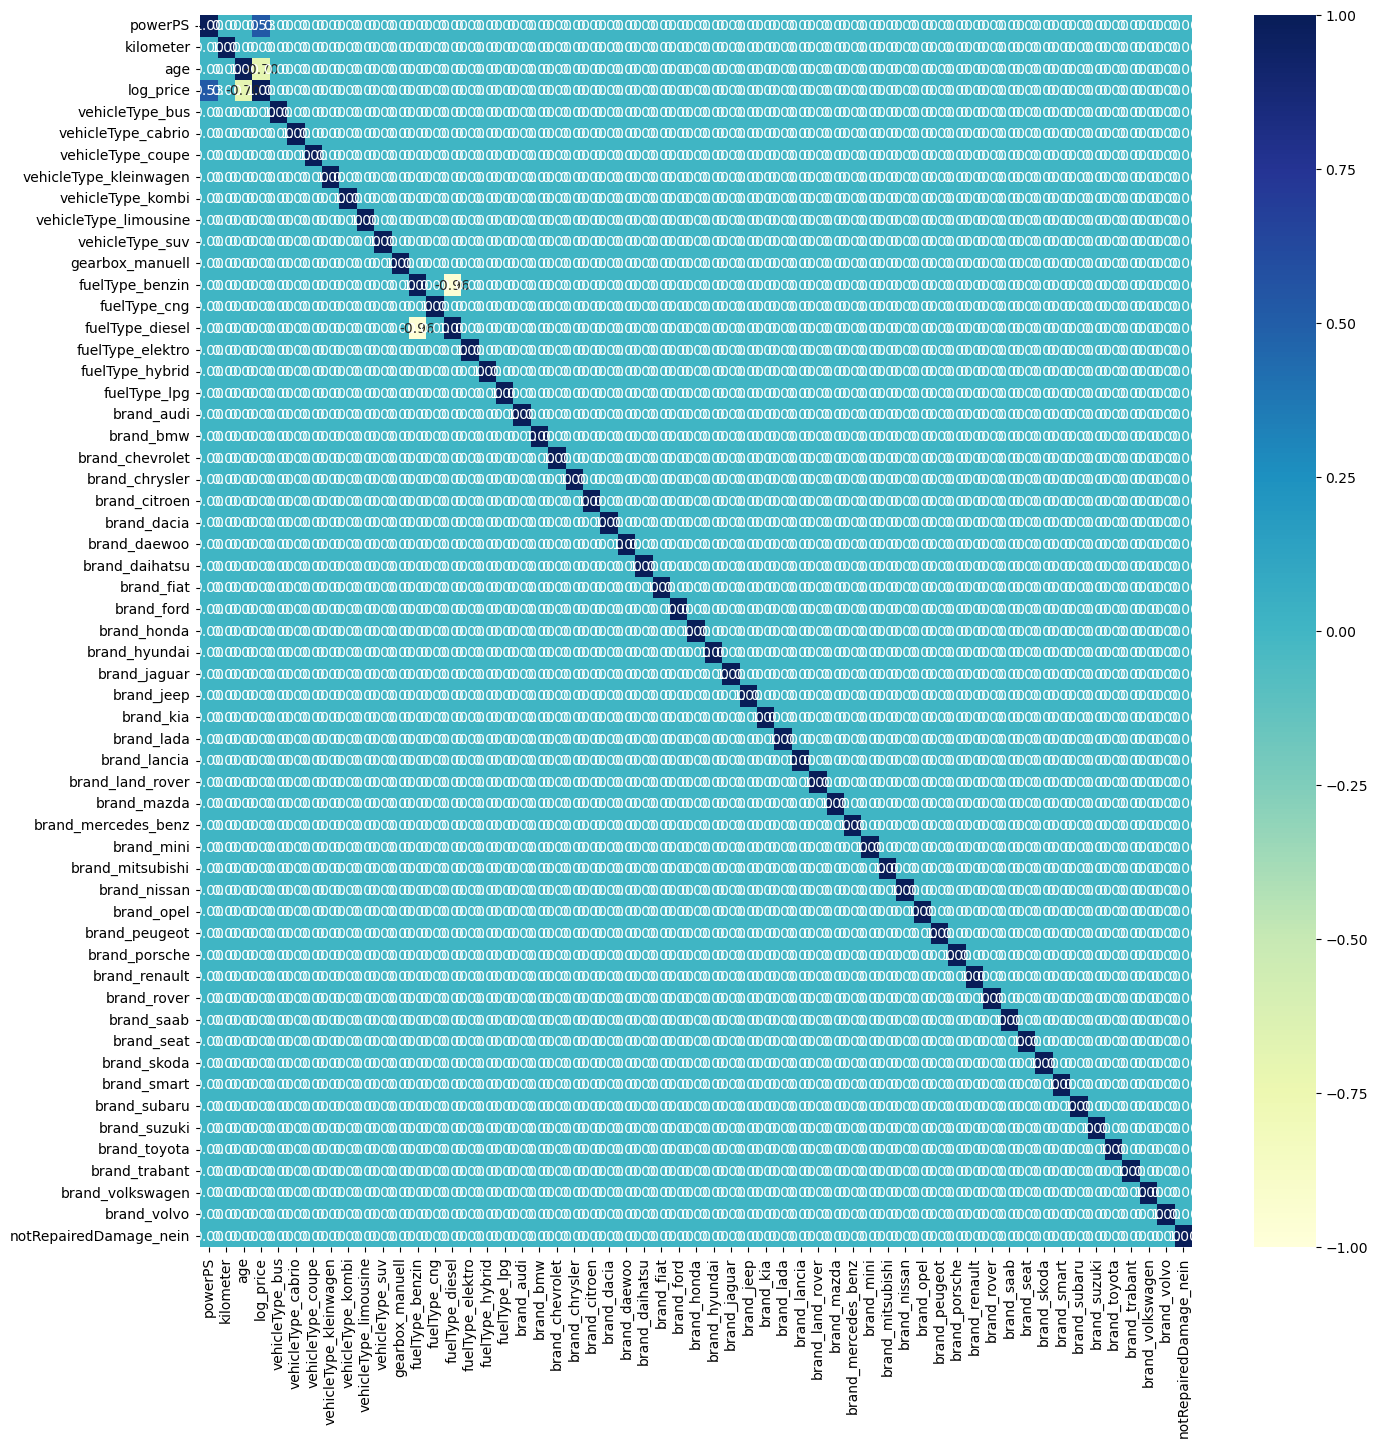

In [50]:
# Affichage de la map de corrélation filtrée
plt.figure(figsize=(16, 16)) 
sns.heatmap(filtered_corr, annot=True, cmap="YlGnBu", fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [51]:
# la matrice est toujours difficile à lire, pour cela j'ai choisi le VIF pour calculer la colinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [52]:
# Ajouter une constante pour le calcul du VIF
X = add_constant(df3_encoded.drop('log_price', axis=1))

In [53]:
X.dtypes

const                     float64
powerPS                     int64
kilometer                   int64
age                         int64
vehicleType_bus              bool
vehicleType_cabrio           bool
vehicleType_coupe            bool
vehicleType_kleinwagen       bool
vehicleType_kombi            bool
vehicleType_limousine        bool
vehicleType_suv              bool
gearbox_manuell              bool
fuelType_benzin              bool
fuelType_cng                 bool
fuelType_diesel              bool
fuelType_elektro             bool
fuelType_hybrid              bool
fuelType_lpg                 bool
brand_audi                   bool
brand_bmw                    bool
brand_chevrolet              bool
brand_chrysler               bool
brand_citroen                bool
brand_dacia                  bool
brand_daewoo                 bool
brand_daihatsu               bool
brand_fiat                   bool
brand_ford                   bool
brand_honda                  bool
brand_hyundai 

In [54]:
# Convertir les variables booléennes en 1 et 0 
X = X.applymap(lambda x: 1 if isinstance(x, bool) else x)

C:\Users\fzmou\AppData\Local\Temp\ipykernel_24468\1928361514.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if isinstance(x, bool) else x)


In [55]:
X.dtypes

const                     float64
powerPS                     int64
kilometer                   int64
age                         int64
vehicleType_bus             int64
vehicleType_cabrio          int64
vehicleType_coupe           int64
vehicleType_kleinwagen      int64
vehicleType_kombi           int64
vehicleType_limousine       int64
vehicleType_suv             int64
gearbox_manuell             int64
fuelType_benzin             int64
fuelType_cng                int64
fuelType_diesel             int64
fuelType_elektro            int64
fuelType_hybrid             int64
fuelType_lpg                int64
brand_audi                  int64
brand_bmw                   int64
brand_chevrolet             int64
brand_chrysler              int64
brand_citroen               int64
brand_dacia                 int64
brand_daewoo                int64
brand_daihatsu              int64
brand_fiat                  int64
brand_ford                  int64
brand_honda                 int64
brand_hyundai 

In [56]:
# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variables indépendantes"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

C:\Program Files\Anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [57]:
vif_data

Variables indépendantes       VIF
0                    const  0.000000
1                  powerPS  1.082052
2                kilometer  1.349508
3                      age  1.428752
4          vehicleType_bus  0.000000
5       vehicleType_cabrio  0.000000
6        vehicleType_coupe  0.000000
7   vehicleType_kleinwagen  0.000000
8        vehicleType_kombi  0.000000
9    vehicleType_limousine  0.000000
10         vehicleType_suv  0.000000
11         gearbox_manuell  0.000000
12         fuelType_benzin  0.000000
13            fuelType_cng  0.000000
14         fuelType_diesel  0.000000
15        fuelType_elektro  0.000000
16         fuelType_hybrid  0.000000
17            fuelType_lpg  0.000000
18              brand_audi  0.000000
19               brand_bmw  0.000000
20         brand_chevrolet  0.000000
21          brand_chrysler  0.000000
22           brand_citroen  0.000000
23             brand_dacia  0.000000
24            brand_daewoo  0.000000
25          brand_daihatsu  0.000000
26              brand_fiat  0.000000
27              brand_ford  0.000000
28             brand_honda  0.000000
29           brand_hyundai  0.000000
30            brand_jaguar  0.000000
31              brand_jeep  0.000000
32               brand_kia  0.000000
33              brand_lada  0.000000
34            brand_lancia  0.000000
35        brand_land_rover  0.000000
36             brand_mazda  0.000000
37     brand_mercedes_benz  0.000000
38              brand_mini  0.000000
39        brand_mitsubishi  0.000000
40            brand_nissan  0.000000
41              brand_opel  0.000000
42           brand_peugeot  0.000000
43           brand_porsche  0.000000
44           brand_renault  0.000000
45             brand_rover  0.000000
46              brand_saab  0.000000
47              brand_seat  0.000000
48             brand_skoda  0.000000
49             brand_smart  0.000000
50            brand_subaru  0.000000
51            brand_suzuki  0.000000
52            brand_toyota  0.000000
53           brand_trabant  0.000000
54        brand_volkswagen  0.000000
55             brand_volvo  0.000000
56  notRepairedDamage_nein  0.000000

In [58]:
# colinéarité très très faible proche de 1 pour les variables quantitatives, je vais les garder
# pour les variables qualitatives c'est logique d'avoir 0 car pas de variabilité 

III-Machine Learning life cycle

III-1-1-Define X and y

In [59]:
X=df3_encoded.drop('log_price',axis=1)
y=df3_encoded['log_price']

In [60]:
#show the head of X
X.head()

powerPS  kilometer  age  vehicleType_bus  vehicleType_cabrio  \
3        75     150000   24            False               False   
4        69      90000   17            False               False   
5       102     150000   30            False               False   
6       109     150000   21            False                True   
10      105     150000   21            False               False   

    vehicleType_coupe  vehicleType_kleinwagen  vehicleType_kombi  \
3               False                    True              False   
4               False                    True              False   
5               False                   False              False   
6               False                   False              False   
10              False                   False              False   

    vehicleType_limousine  vehicleType_suv  ...  brand_seat  brand_skoda  \
3                   False            False  ...       False        False   
4                   False            False  ...       False         True   
5                    True            False  ...       False        False   
6                   False            False  ...       False        False   
10                   True            False  ...       False        False   

    brand_smart  brand_subaru  brand_suzuki  brand_toyota  brand_trabant  \
3         False         False         False         False          False   
4         False         False         False         False          False   
5         False         False         False         False          False   
6         False         False         False         False          False   
10        False         False         False         False          False   

    brand_volkswagen  brand_volvo  notRepairedDamage_nein  
3               True        False                    True  
4              False        False                    True  
5              False        False                   False  
6              False        False                    True  
10             False        False                    True  

[5 rows x 56 columns]

In [61]:
#show the shape of X and y
X.shape, y.shape

((250204, 56), (250204,))

III-1-2-Scale de data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
# Fit X 
scaler.fit(X)

StandardScaler()

In [64]:
X_scaled = scaler.transform(X)

III-2-Train/Test Split

In [65]:
# split the data between the train and test dataset (test_size=0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.3, random_state=1)

III-3-Linear Regression Model

III-3-1-Loading and training the model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [68]:
# show the model parameters
print ('Coefficients: ', LR.coef_)
print ('Intercept: ',LR.intercept_)

Coefficients:  [ 0.26875838 -0.18864348 -0.58711165  0.0470924   0.10113621  0.02654868
 -0.08829847 -0.06208815 -0.02964029  0.06329721 -0.03161215  0.11205665
  0.01103909  0.21284432  0.00607965  0.01030492  0.03783563  0.14981448
  0.1610013   0.00640137 -0.00705133 -0.00351997 -0.00572612 -0.01520965
 -0.00625817 -0.01050952 -0.01226959  0.02551014 -0.00639674  0.02128792
  0.01766043 -0.0089545  -0.00630556 -0.00280014  0.02643     0.01011636
  0.15238874  0.0640352  -0.00364957  0.01065988  0.00621409 -0.00672757
  0.06296638 -0.02487633 -0.00645427  0.00835677  0.02212413  0.0426817
  0.00703669  0.00927139  0.01107416  0.03999477  0.03753722  0.1638439
  0.02633434  0.20641362]
Intercept:  8.158215972583085


III-3-2-Prediction

In [69]:
yp_LR = LR.predict(X_test)

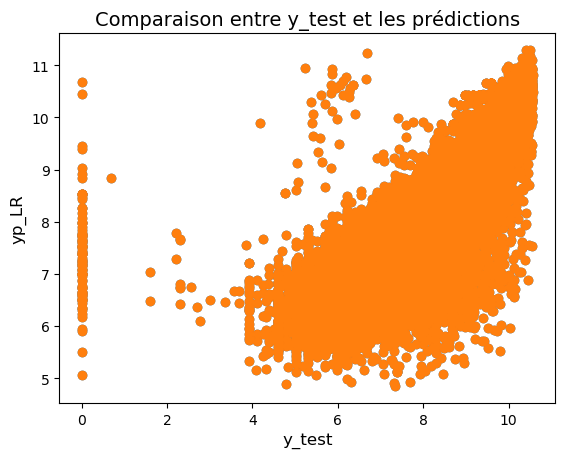

In [70]:
plt.scatter(y_test,yp_LR)
plt.scatter(y_test, yp_LR)
plt.xlabel('y_test', size=12)
plt.ylabel('yp_LR', size=12)
plt.title('Comparaison entre y_test et les prédictions', size=14)
plt.show()

# corrélation positive entre y_test et yp_LR, plus le prix réel y_test augmente, plus le prix prédit yp_LR augmente
# les points sont à peu près parfaitement alignés sur la diagonale 
# Les petits prix sont dispersées, cela suggère que le modèle a du mal à prédire les voitures les moins chères

C:\Users\fzmou\AppData\Local\Temp\ipykernel_24468\2519384268.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-yp_LR),bins=50);


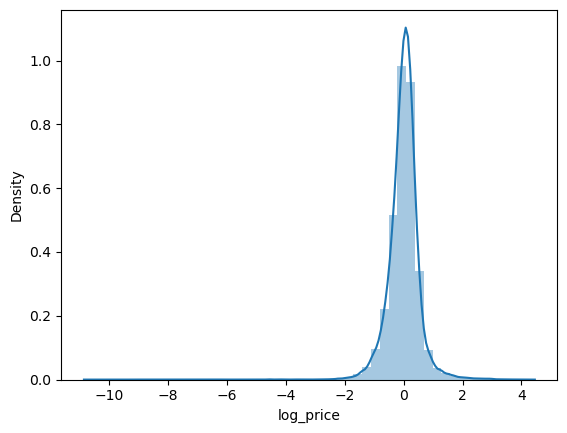

In [71]:
# Residual Histogram
sns.distplot((y_test-yp_LR),bins=50);

# La courbe est centrée sur 0, cela indique que les prédictions sont en moyenne correctes
# La queue est étendue vers la gauche ce qui suggère que le modèle sous-estime certaines valeurs réelles
# Les résidus négatifs (à gauche) correspondent à des cas où le modèle a surestimé le prix réel (yp_LR > y_test).# 
Les résidus positifs (à droite) indiquent une sous-estimationyp_LR(ŷ < y_test).

III-3-3-Evaluate the model

In [72]:
from sklearn import metrics

In [73]:
mse_LR = mean_squared_error(y_test, yp_LR)
r2_LR = r2_score(y_test, yp_LR)

print(f'Linear Regression - MSE: {mse_LR:.2f}, R²: {r2_LR:.2f}')

Linear Regression - MSE: 0.33, R²: 0.75


# R²=0.75 signifie que 75% de la variabilité de la variable cible (y_test) est expliqué par le modèle LR.

In [74]:
rmse_LR = mean_squared_error(y_test, yp_LR, squared=False)
print(f"RMSE (LR): {rmse_LR:.4f}")

RMSE (LR): 0.5766


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# L’erreur entre le log(prix réel) et le log(prix prédit) est d’environ 0.58
# En moyenne, les prédictions du modèle sont à un facteur multiplicatif de 1.78 du vrai prix.

III-4-Ridge Regression

In [75]:
from sklearn.linear_model import Ridge

In [76]:
# Convertir les booléens en entiers
X = X.astype(int)  

In [77]:
X = X.to_numpy()

In [78]:
from sklearn.linear_model import Ridge

In [79]:
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

yp_ridge = ridge.predict(X_test)

In [80]:
mse_ridge = mean_squared_error(y_test, yp_ridge)
r2_ridge = r2_score(y_test, yp_ridge)

print(f'Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}')

Ridge Regression - MSE: 0.33, R²: 0.75


In [81]:
rmse_ridge = mean_squared_error(y_test, yp_ridge, squared=False)
print(f"RMSE (ridge): {rmse_ridge:.4f}")

RMSE (ridge): 0.5766


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


III-5-Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

In [83]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

yp_lasso = lasso.predict(X_test)

In [84]:
mse_lasso = mean_squared_error(y_test, yp_lasso)
r2_lasso = r2_score(y_test, yp_lasso)

print(f'Lasso Regression - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}')

Lasso Regression - MSE: 0.43, R²: 0.68


In [85]:
rmse_lasso = mean_squared_error(y_test, yp_lasso, squared=False)
print(f"RMSE (lasso): {rmse_lasso:.4f}")

RMSE (lasso): 0.6577


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


III-6-ElasticNet Regression

In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

yp_elastic = elastic.predict(X_test)

In [88]:
mse_elastic = mean_squared_error(y_test, yp_elastic)
r2_elastic = r2_score(y_test, yp_elastic)

print(f'Elastic Net - MSE: {mse_elastic:.2f}, R²: {r2_elastic:.2f}')

Elastic Net - MSE: 0.38, R²: 0.72


In [93]:
rmse_elastic = mean_squared_error(y_test, yp_elastic, squared=False)
print(f"RMSE (elastic): {rmse_elastic:.4f}")

RMSE (elastic): 0.6195


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


III-7-DecisionTree

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
dt = DecisionTreeRegressor(random_state=1, max_depth=5)
dt.fit(X_train, y_train)

yp_dt = dt.predict(X_test)

In [96]:
mse_dt = mean_squared_error(y_test, yp_dt)
r2_dt = r2_score(y_test, yp_dt)

print(f'Decision Tree - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}')

Decision Tree - MSE: 0.38, R²: 0.72


In [97]:
rmse_dt = mean_squared_error(y_test, yp_dt, squared=False)
print(f"RMSE (dt): {rmse_dt:.4f}")

RMSE (dt): 0.6174


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


III-8-KNN

In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

yp_knn = knn.predict(X_test)

In [100]:
mse_knn = mean_squared_error(y_test, yp_knn)
r2_knn = r2_score(y_test, yp_knn)

print(f'KNN - MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}')

KNN - MSE: 0.27, R²: 0.80


In [101]:
rmse_knn = mean_squared_error(y_test, yp_knn, squared=False)
print(f"RMSE (knn): {rmse_knn:.4f}")

RMSE (knn): 0.5166


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# The metrics for each model

In [102]:
# Créer un dictionnaire contenant les résultats des modèles
results = {
    "Model": ["LR", "ridge", "lasso", "elastic", "dt", "knn"],  
    "RMSE": [rmse_LR, rmse_ridge, rmse_lasso, rmse_elastic, rmse_dt, rmse_knn],
    "R²": [r2_LR, r2_ridge, r2_lasso, r2_elastic, r2_dt, r2_knn]
}

In [103]:
# Convertir en DataFrame
df_results = pd.DataFrame(results)
df_results.sort_values(by="RMSE", ascending=True, inplace=True)
df_results

Model      RMSE        R²
5      knn  0.516581  0.801937
1    ridge  0.576580  0.753257
0       LR  0.576580  0.753257
4       dt  0.617405  0.717078
3  elastic  0.619523  0.715134
2    lasso  0.657733  0.678912

# Les 3 premiers modèles ayant un RMSE bas sont les meilleurs aussi R² est élevé : knn, ridge et LR
# Parmi tous les modèles testés, le KNN Regressor présente les meilleures performances avec RMSE = 0.5166 et une bonne capacité explicative R² = 0.80
# La régression linéaire et Ridge obtiennent également des résultats satisfaisants (R² ≈ 0.75), tandis que Lasso montre les performances les plus faibles.
# Le modèle KNN est le plus adapté pour prédire le log(price) des voitures.
# NB : j'ai choisi RMSE pour comparer avec la même unité du log prix
# NB : SVM n'a pas voulu s'exécuter à mainte reprise c'est pour cela je l'ai pas integrer avec les modèles ci dessus

III-10- Cross Validation of models

In [104]:
#Définition des modèles
models =[('LR',LinearRegression()),
         ('ridge',Ridge()),
         ('lasso',Lasso()),
         ('elastic',ElasticNet()),
         ('dt',DecisionTreeRegressor(random_state=1)),
         ('knn',KNeighborsRegressor()),
        ]

In [105]:
# cross-validate the models
from sklearn.model_selection import cross_val_score, KFold
scoring='r2'
kfold=KFold(n_splits=10,shuffle=True, random_state=1)
names=[]
cv_res=[]
cv_res_mean=[]
for name, model in models:
    res=cross_val_score(model,X_train,y_train,scoring=scoring, cv=kfold)
    names.append(name)
    cv_res.append(res)
    cv_res_mean.append(round(np.mean(res),2))

In [106]:
df_results['R2_CV']=cv_res_mean
df_results

Model      RMSE        R²  R2_CV
5      knn  0.516581  0.801937   0.75
1    ridge  0.576580  0.753257   0.75
0       LR  0.576580  0.753257  -0.00
4       dt  0.617405  0.717078   0.25
3  elastic  0.619523  0.715134   0.75
2    lasso  0.657733  0.678912   0.80

# Le modèle KNN présente les meilleures performances globales avec un RMSE faible, un R² élevé, et une bonne stabilité en cross-validation.
# Si on cherche la meilleure généralisation : haut R²_CV :Lasso a le meilleur R²_CV (0.81 et 0.77), donc il est plus robuste sur de nouveaux dataset.
# Je vais effectuer le tuning sur ces 2 modèles

III-10-model Tuning

In [107]:
# Tuning pour le modèle Lasso

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)

print("Meilleur alpha:", grid_lasso.best_params_)
print("Meilleur R²:", grid_lasso.best_score_)


Meilleur alpha: {'alpha': 0.0001}
Meilleur R²: 0.7502002846593662


# J'ai effectué le tuning du modèle knn mais ça n'a pas marché, j'ai essayé GridSearchCV et RandomizedSearchCV ça n'a pas marché donc j'ai gardé le modèle lasso.

In [110]:
# Entraîner un nouveau modèle Lasso avec cet alpha optimal
best_alpha = grid_lasso.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [111]:
# Faire les prédictions

y_pred_best_lasso = best_lasso.predict(X_test)
y_pred_best_lasso

array([ 8.32907323,  7.09375622, 10.43006156, ...,  6.69036936,
        8.84668181,  6.07139899])

In [112]:
# Evaluer les performances du modèle de régression Lasso avec le nouveau hyperparamètre alpha en calculant r² et rmse
r2 = r2_score(y_test, y_pred_best_lasso)
rmse = mean_squared_error(y_test, y_pred_best_lasso, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: 0.7532775708819888
RMSE: 0.5765559896394683


C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# On remarque après le tuning du lasso et l'entrainement avec le nouveau alpha on a eu une dimunition du RMSE et augmentation du R²

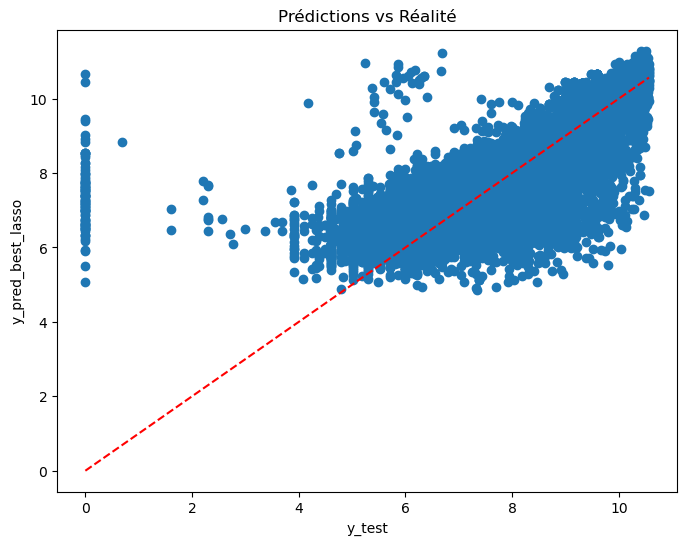

In [119]:
# visuation des prédiction par le nouveau modèle lasso
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('y_test')
plt.ylabel('y_pred_best_lasso')
plt.title('Prédictions vs Réalité')
plt.show()


# Le modèle Lasso, après ajustement de l’hyperparamètre alpha, présente une meilleure performance en réduisant la dispersion des prédictions autour de la tendance centrale

C:\Users\fzmou\AppData\Local\Temp\ipykernel_24468\2463055251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_pred_best_lasso),bins=50);


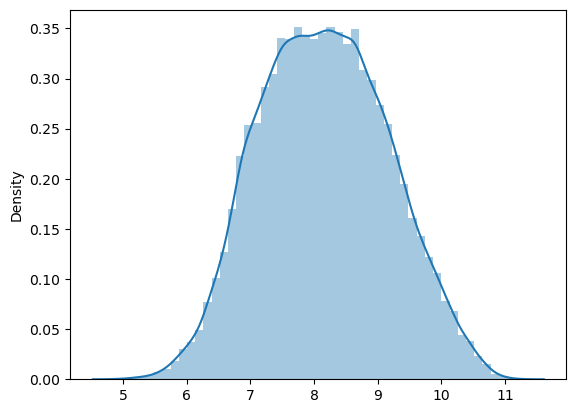

In [121]:
# Residual Histogram
sns.distplot((y_pred_best_lasso),bins=50);

# Le modèle Lasso ajusté avec le nouveau paramètre alpha semble fournir des prédictions de bonne qualité, y'a une distribution relativement normale des résidus

IV-Model saving

In [122]:
import pickle
filename = 'lasso_usedcar.pkl'
pickle.dump(best_lasso, open(filename, 'wb'))

In [123]:
#load the saved model
lasso_model = pickle.load(open(filename, "rb"))

V-Deploiement sur Streamlit

In [124]:
import streamlit as st 

In [125]:
#titre de l'application
st.title("📊 Prédiction du Prix des Voitures d'Occasion avec Lasso Regression")

2025-06-30 10:34:11.550 
  command:

    streamlit run C:\Program Files\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()